In [14]:
import cv2
import matplotlib.pyplot as plt


In [15]:
img = cv2.imread('imgpack/RAW/1_Chicago.jpg', cv2.IMREAD_GRAYSCALE)

In [16]:
## Creo funciones auxiliares para usarlas en la función final

In [17]:
def Histograma(img):
    " Para crear una lista ordenada con los valores"
    l=[0 for x in range(256)]
    for m in img:
        l2=m.tolist()
        for x in range(256):
            l[x]=l[x]+l2.count(x)
    return l

In [18]:
def Cmin (histograma,porcentaje):
    numpixel=sum(histograma)
    cmin=0
    cont=0
    ret = numpixel * (porcentaje)
    for i in range(len(histograma)):
        if cont>ret:
            res=i
            break
        else:
            cont=cont+histograma[i]
    return res
    

In [19]:
def Cmax (histograma,porcentaje):
    numpixel=sum(histograma)
    cmin=0
    cont=0
    ret = numpixel * (1-porcentaje)
    for i in range(len(histograma)):
        if cont>ret:
            res=i
            break
        else:
            cont=cont+histograma[i]
    return res

In [20]:
def expan (img, cmin, cmax):
    resimg = img.copy()
    ndmax=255
    ndmin=0
    for i in range(resimg.shape[0]):
        for j in range(resimg.shape[1]):
            if resimg[i][j] <= cmin:
                resimg[i][j]= 0
            elif resimg[i][j]>=cmax:
                resimg[i][j]= 255
            else:
                resimg[i][j]=ndmin+(((resimg[i][j]-cmin)*(ndmax-ndmin))/(cmax-cmin))
    return resimg

In [21]:
##### FUNCIÓN FINAL ######

In [22]:
def corte(img,porc):
    his = Histograma(img)
    cmin = Cmin(his,porc)
    cmax = Cmax(his,porc)
    resimg=expan(img,cmin,cmax)
    return resimg

In [23]:
imgex=corte(img,0.1)

<function matplotlib.pyplot.show(close=None, block=None)>

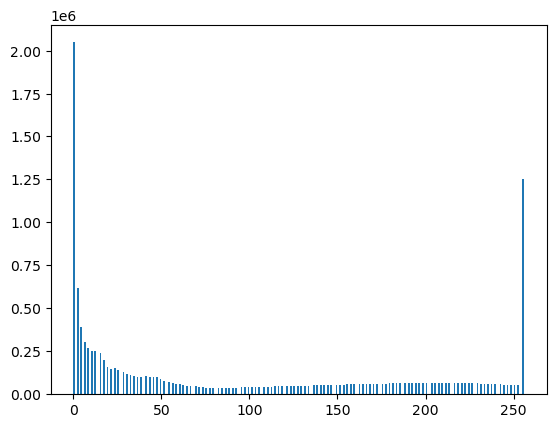

In [24]:
plt.hist(imgex.ravel(),256,[0,256])
plt.show

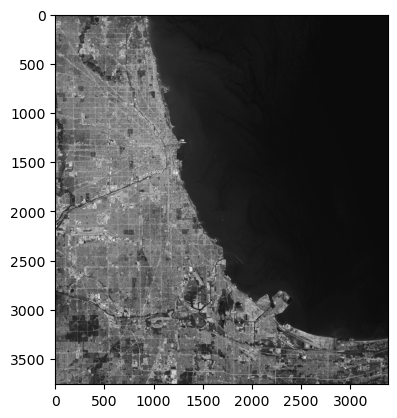

In [25]:
plt.imshow(img,cmap='gray') ##Imagen sin tratar

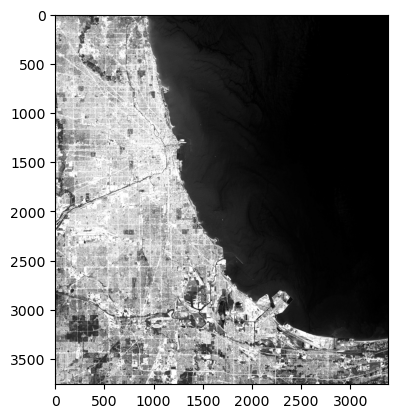

In [26]:
plt.imshow(imgex,cmap='gray') ##Imagen tratada